## Importing necessary libraries and the dataset

In [1]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Looking at the first ten rows of the dataset

In [2]:
#Load to Tips Dataset
#Your Code Here

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Looking at the descriptive statistics of each numeric column, the data types in our dataset and correlation
The data type conversions will depend on the problem we aim to solve here

In [3]:
#Your Code Here

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
#Your Code Here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
#Correlation
#Your Code Here

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Preprocessing
I want to predict the tip from other columns, therefore, I have to scale the numerical columns and encode categorical columns. For binary ones, you have to either use label encoding or one hot encode them, then drop duplicate ones.

In [13]:
#Your Code Here

There are two unique values in sex, time and smoker columns and four values in day column, so we have to encode sex, time and smoker with label encoder and encode day with one hot encoder.

I'm going to encode the day column with pandas' get_dummies method then directly append it to the main dataframe with pd.concat.

In [14]:
#Your Code Here

,total_bill,tip,sex,smoker,day,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1,0


I will import Label Encoder from sklearn, instantiate it, and fit and transform the columns that I want to label, then convert the output array into dataframe and insert it to the original one.

In [15]:
#Your Code Here

In [16]:
#Your Code Here

Now I will import MinMaxScaler to normalize the numerical columns, and put them in another dataframe called scaled_columns, then drop the original columns and append them to the original dataframe.

In [17]:
#Your Code Here

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,0.350145,0.222031,0.313934
std,0.186477,0.153738,0.190220
min,0.000000,0.000000,0.000000
25%,0.215281,0.111111,0.200000
50%,0.308442,0.211111,0.200000
75%,0.441087,0.284722,0.400000
max,1.000000,1.000000,1.000000


In [18]:
#Your Code Here

Let's see the last version of the dataframe. Everything should be numeric.

In [19]:
#Your Code Here

,sex,smoker,time,day_Fri,day_Sat,day_Sun,day_Thur,total_bill,tip,size
0,0,0,0,0,0,1,0,0.291579,0.001111,0.2
1,1,0,0,0,0,1,0,0.152283,0.073333,0.4
2,1,0,0,0,0,1,0,0.375786,0.277778,0.4
3,1,0,0,0,0,1,0,0.431713,0.256667,0.2
4,0,0,0,0,0,1,0,0.450775,0.290000,0.6


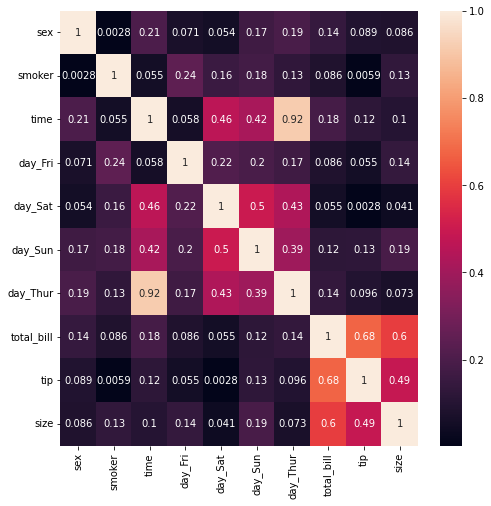

In [20]:
#correlation
#Your Code Here

# Data Visualization
I will visualize correlation with heatmap, use count plots to see if the women or men come to the restaurant more than one another. Then I'll see if the tip left really depends on the gender of the customer with box plot.

In [55]:
#HeatMap
#Your Code Here

In [56]:
#CatPlot
#Your Code Here

In [57]:
#CatPlot
#Your Code Here

Let's see how many days there are, then look at the relationship between the total bill paid and the tip, with respect to days.

In [58]:
#Your Code Here

In [59]:
#RelPlot
#Your Code Here

Let's see if people come over more in day time or in the evening.

In [60]:
#Your Code Here

Let's see the correlation between the tip column with others.

In [61]:
df.corrwith(df["tip"])

sex           0.088862
smoker        0.005929
time         -0.121629
day_Fri      -0.055463
day_Sat      -0.002790
day_Sun       0.125114
day_Thur     -0.095879
total_bill    0.675734
tip           1.000000
size          0.489299
dtype: float64

# Preparing data for regression
I'm going to separate my target column from the dataframe, then select best features.

In [38]:
target = df.tip
features = df.loc[:,df.columns!="tip"]

In [39]:
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(k=5)
k_best_features = kbest.fit_transform(features, target)
list(df.columns[kbest.get_support (indices=True)])

['sex', 'day_Sat', 'day_Sun', 'total_bill', 'tip']

Another way to choose the best features is to look at the Pearson Correlations.

In [40]:
df.corrwith(df["tip"]).abs().nlargest(6)

tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
time          0.121629
day_Thur      0.095879
dtype: float64

### Train test split
And then I'll use basic support vector regressor to predict the tips.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)
pred = linearreg.predict(X_test)

Coefficients (slope and intercept) of the model:

In [43]:
print("Coefficients: \n", linearreg.coef_)
print("Intercept: \n", linearreg.intercept_)

Coefficients: 
 [-1.45425678e-02  3.19032646e-03 -1.98808241e-03 -1.68374542e+13
 -1.68374542e+13 -1.68374542e+13 -1.68374542e+13  5.07363655e-01
  1.02987798e-01]
Intercept: 
 16837454163801.254


### Evaluation
Let's evaluate our model. I'll look at r-squared and mean absolute error.
We have low r2 and a relatively high mean absolute error, the model underfits, probably the selected columns were poorly selected. 

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error
print(r2_score(pred, y_test))
print(mean_absolute_error(pred, y_test))

0.15775525169384996
0.08539576247165534


I want to demonstrate classification, I will predict gender from rest of the columns. I'll use KNN with GridSearchCV.

In [45]:
X = df[["total_bill","day_Sun","day_Sat","tip","day_Thur","day_Fri","smoker", "size","time"]]
Y = df["sex"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = [{"n_neighbors":[3, 5, 9, 13, 17, 19], "weights":["uniform","distance"]}]
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X, Y)
grid_search.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [47]:
grid_search.best_score_

0.6233333333333333

In [48]:
predcv = grid_search.best_estimator_.predict(X_test)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predcv))

              precision    recall  f1-score   support

           0       0.50      0.24      0.32        17
           1       0.68      0.88      0.77        32

    accuracy                           0.65        49
   macro avg       0.59      0.56      0.54        49
weighted avg       0.62      0.65      0.61        49



Finally, I want to demonstrate cross validation (basic k-fold version and stratified k-fold). This time, I'll use basic logistic regression.

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(log, X, Y, cv=10).mean()

0.5735

In [52]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(log, X, Y, cv=skf)
print("scores:\n{}".format(scores))
print("average score:\n{}".format(scores.mean()))

scores:
[0.64       0.64       0.68       0.4        0.33333333 0.58333333
 0.70833333 0.66666667 0.5        0.58333333]
average score:
0.5735


Finally, let's demonstrate decision trees and visualize our decision tree.

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=8)
dtree.fit(X_train, y_train)
preddt = dtree.predict(X_test)
print(classification_report(y_test,preddt))

              precision    recall  f1-score   support

           0       0.44      0.24      0.31        17
           1       0.68      0.84      0.75        32

    accuracy                           0.63        49
   macro avg       0.56      0.54      0.53        49
weighted avg       0.60      0.63      0.60        49



One can clearly see the effect of class imbalances on classification report.

In [54]:
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file="tree3.png", class_names=["female","male"], feature_names=X.columns)

To open .dot files on macbook simply type this to your terminal: dot -Tpng DocName.dot -o DocName.png

That's all for this project, feel free to contribute to it, make pull requests and suggestions.